In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1. Import Data and Check Data

In [2]:
df = pd.read_csv(r'C:\Users\Moses\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### 1.1 Dataset Structure: 1470 observations (rows), 35 features (variables) 

In [4]:
df.shape

(1470, 35)

### 1.2 Data Summary 

In [5]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


### 1.3  Missing Data: no missing data

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 1.4 Outliers Data: just check, but keep outliers

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape
#The above code will remove the outliers from the dataset.

(779, 35)

### 1.5 Data Type: int64 and object

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### 1.6 Imbalanced Dataset with Label 'Attrition': more people stay in the organization than they actually leave

In [9]:
print(df['Attrition'].value_counts())
print('{:.2%} employees did not leave the organization'.format(df['Attrition'].value_counts()[0]/df.shape[0]))
print('{:.2%} employees did leave the organization'.format(df['Attrition'].value_counts()[1]/df.shape[0]))

No     1233
Yes     237
Name: Attrition, dtype: int64
83.88% employees did not leave the organization
16.12% employees did leave the organization


Use the right evaluation metrics (F1 score, ROC-AUC) - Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous.

## 2. Data Analysis 

People analytics has focused mostly on employee attribute data.

Trait: facts about individuals that don’t change, such as ethnicity, gender, and work history.

State: facts about individuals that do change, such as age, education level, company tenure, value of received bonuses, commute distance, and days absent.

### 2.1 Gender 

In [10]:
print(df['Gender'].value_counts())

Male      882
Female    588
Name: Gender, dtype: int64


In [11]:
df[['Gender','Age','Education','JobSatisfaction','MonthlyIncome','EnvironmentSatisfaction','RelationshipSatisfaction']].groupby('Gender').mean()

,Age,Education,JobSatisfaction,MonthlyIncome,EnvironmentSatisfaction,RelationshipSatisfaction
Gender,,,,,,
Female,37.329932,2.933673,2.683673,6686.566327,2.721088,2.681973
Male,36.653061,2.899093,2.758503,6380.507937,2.722222,2.732426


In [12]:
df[['Gender','Attrition','Age','Education','JobSatisfaction','MonthlyIncome','EnvironmentSatisfaction','RelationshipSatisfaction']].groupby(['Gender','Attrition']).mean()

Age  Education  JobSatisfaction  MonthlyIncome  EnvironmentSatisfaction  RelationshipSatisfaction
Gender Attrition                                                                                                         
Female No         38.155689   2.960080         2.728543    7019.429142                 2.782435                  2.722555
       Yes        32.574713   2.781609         2.425287    4769.735632                 2.367816                  2.448276
Male   No         37.154372   2.904372         2.812842    6704.964481                 2.763661                  2.741803
       Yes        34.206667   2.873333         2.493333    4797.160000                 2.520000                  2.686667

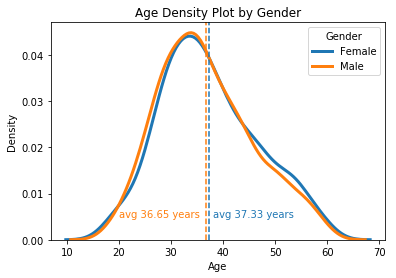

In [13]:
genders = ['Female', 'Male']


for gender in genders:
    subset = df[df['Gender'] == gender]
    sns.distplot(subset['Age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = gender)
    

plt.legend(title = 'Gender')
plt.title('Age Density Plot by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.axvline(37.33, 0, 1,ls='--',color='#1f77b4')
plt.axvline(36.65, 0, 1,ls='--',color='#ff7f0e')
plt.text(38,0.005,'avg 37.33 years',rotation=0,color='#1f77b4')
plt.text(20,0.005,'avg 36.65 years',rotation=0,color='#ff7f0e')
plt.show()

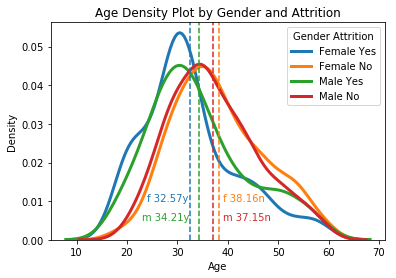

In [14]:
genders = ['Female', 'Male']
attritions = ['Yes','No']


for gender in genders:
    for attrition in attritions:
        subset = df[(df['Gender'] == gender) & (df['Attrition']==attrition)]
        sns.distplot(subset['Age'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},label=gender +' '+ attrition)
plt.legend(title = 'Gender Attrition')
plt.title('Age Density Plot by Gender and Attrition')
plt.xlabel('Age')
plt.ylabel('Density')
plt.axvline(32.57, 0, 1,ls='--',color='#1f77b4')
plt.axvline(38.16, 0, 1,ls='--',color='#ff7f0e')
plt.axvline(34.21, 0, 1,ls='--',color='#2ca02c')
plt.axvline(37.15, 0, 1,ls='--',color='#d62728')
plt.text(24,0.010,'f 32.57y',rotation=0,color='#1f77b4')
plt.text(39,0.010,'f 38.16n',rotation=0,color='#ff7f0e')
plt.text(23,0.005,'m 34.21y',rotation=0,color='#2ca02c')
plt.text(39,0.005,'m 37.15n',rotation=0,color='#d62728')
plt.show()    

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

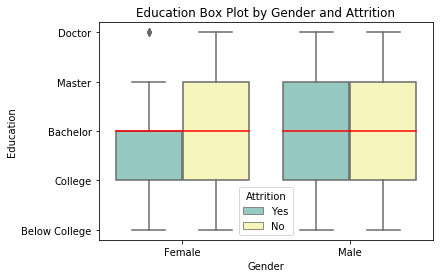

In [15]:
sns.boxplot(x='Gender', y='Education', hue="Attrition", data=df,medianprops={'color':'red'}, palette="Set3")
plt.title('Education Box Plot by Gender and Attrition')
y_values = ['Below College', 'College' , 'Bachelor' , 'Master' , 'Doctor']
y_axis = [1,2,3,4,5]
plt.yticks(y_axis, y_values)
plt.show()

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

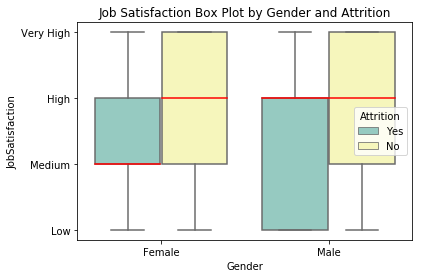

In [16]:
sns.boxplot(x='Gender', y='JobSatisfaction', hue="Attrition", data=df,medianprops={'color':'red'}, palette="Set3")
plt.title('Job Satisfaction Box Plot by Gender and Attrition')
y_values = ['Low' , 'Medium' , 'High' , 'Very High']
y_axis = [1,2,3,4]
plt.yticks(y_axis, y_values)
plt.show()

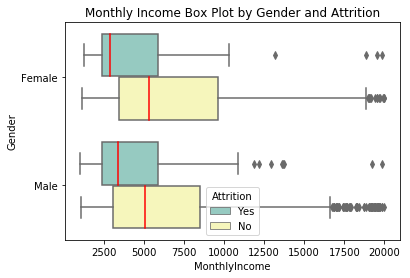

In [17]:
sns.boxplot(y='Gender', x='MonthlyIncome', hue="Attrition", data=df,medianprops={'color':'red'}, palette="Set3")
plt.title('Monthly Income Box Plot by Gender and Attrition')
plt.show()

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

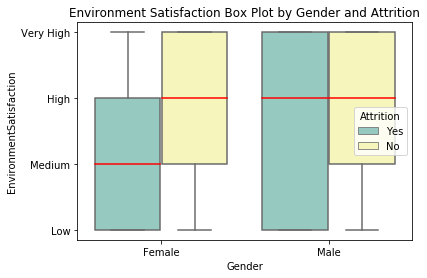

In [18]:
sns.boxplot(x='Gender', y='EnvironmentSatisfaction',hue='Attrition', data=df,medianprops={'color':'red'}, palette='Set3')
plt.title('Environment Satisfaction Box Plot by Gender and Attrition')
y_values = ['Low' , 'Medium' , 'High' , 'Very High']
y_axis = [1,2,3,4]
plt.yticks(y_axis, y_values)
plt.show()

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

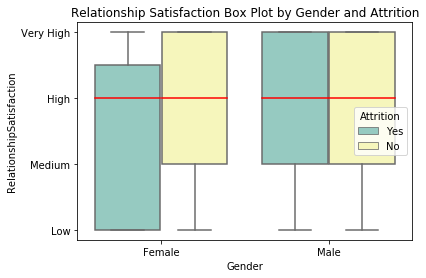

In [19]:
sns.boxplot(x='Gender', y='RelationshipSatisfaction',hue='Attrition', data=df,medianprops={'color':'red'}, palette='Set3')
plt.title('Relationship Satisfaction Box Plot by Gender and Attrition')
y_values = ['Low' , 'Medium' , 'High' , 'Very High']
y_axis = [1,2,3,4]
plt.yticks(y_axis, y_values)
plt.show()

### 2.2  Income

In this dataset: 

DailyRate                    
HourlyRate                   
MonthlyIncome                
MonthlyRate                  
PercentSalaryHike            

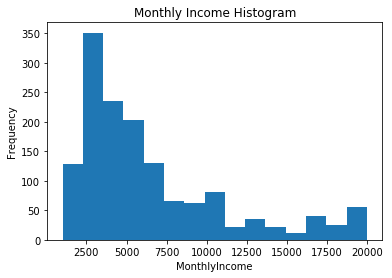

In [20]:
plt.hist(df['MonthlyIncome'],15)
plt.title('Monthly Income Histogram')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.show()

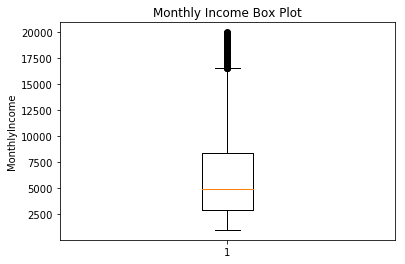

In [21]:
plt.boxplot(df['MonthlyIncome'])
plt.title('Monthly Income Box Plot')
plt.ylabel('MonthlyIncome')
plt.show()

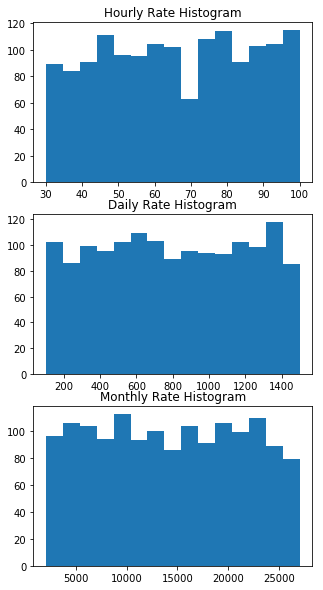

In [22]:
plt.figure(figsize=[5,10])
plt.subplot(311)
plt.hist(df['HourlyRate'],15)
plt.title('Hourly Rate Histogram')
plt.subplot(312)
plt.hist(df['DailyRate'],15)
plt.title('Daily Rate Histogram')
plt.subplot(313)
plt.hist(df['MonthlyRate'],15)
plt.title('Monthly Rate Histogram')
plt.show()

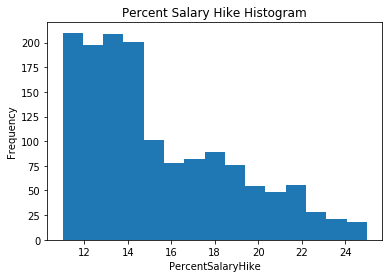

In [23]:
plt.hist(df['PercentSalaryHike'],15)
plt.title('Percent Salary Hike Histogram')
plt.xlabel('PercentSalaryHike')
plt.ylabel('Frequency')
plt.show()

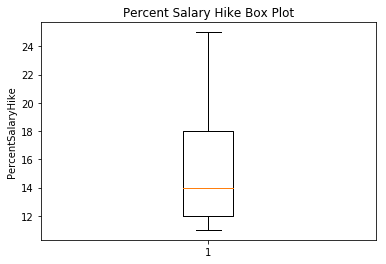

In [24]:
plt.boxplot(df['PercentSalaryHike'])
plt.title('Percent Salary Hike Box Plot')
plt.ylabel('PercentSalaryHike')
plt.show()

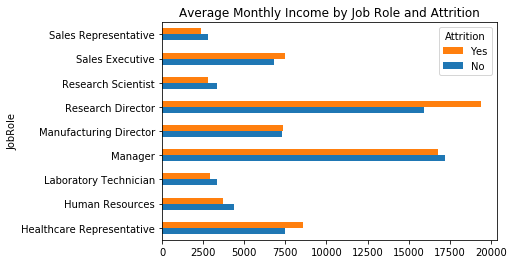

In [25]:
subset=df[['JobRole','Attrition','MonthlyIncome']].groupby(['JobRole','Attrition']).mean().reset_index()
subset.pivot('JobRole','Attrition','MonthlyIncome').plot(kind='barh',legend='reverse',title='Average Monthly Income by Job Role and Attrition')
plt.show()

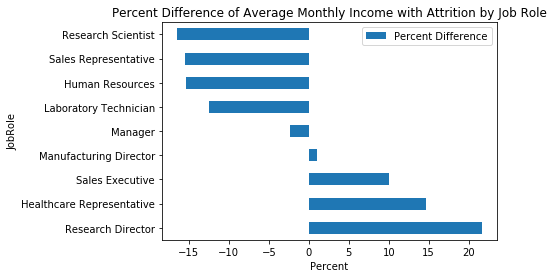

In [26]:
subset=df[['JobRole','Attrition','MonthlyIncome']].groupby(['JobRole','Attrition']).mean().reset_index()
subset=subset.pivot('JobRole','Attrition','MonthlyIncome')
subset['Percent Difference']=(subset['Yes']-subset['No'])/subset['No']*100
subset.sort_values('Percent Difference',ascending=False)['Percent Difference'].plot(kind='barh',legend='reverse',title='Percent Difference of Average Monthly Income with Attrition by Job Role')
plt.xlabel('Percent')
plt.show()

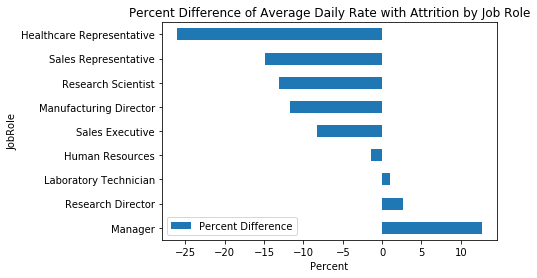

In [27]:
subset=df[['JobRole','Attrition','DailyRate']].groupby(['JobRole','Attrition']).mean().reset_index()
subset=subset.pivot('JobRole','Attrition','DailyRate')
subset['Percent Difference']=(subset['Yes']-subset['No'])/subset['No']*100
subset.sort_values('Percent Difference',ascending=False)['Percent Difference'].plot(kind='barh',legend='reverse',title='Percent Difference of Average Daily Rate with Attrition by Job Role')
plt.xlabel('Percent')
plt.show()

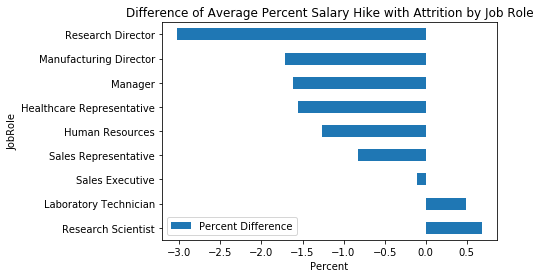

In [28]:
subset=df[['JobRole','Attrition','PercentSalaryHike']].groupby(['JobRole','Attrition']).mean().reset_index()
subset=subset.pivot('JobRole','Attrition','PercentSalaryHike')
subset['Percent Difference']=subset['Yes']-subset['No']
subset.sort_values('Percent Difference',ascending=False)['Percent Difference'].plot(kind='barh',legend='reverse',title='Difference of Average Percent Salary Hike with Attrition by Job Role')
plt.xlabel('Percent')
plt.show()

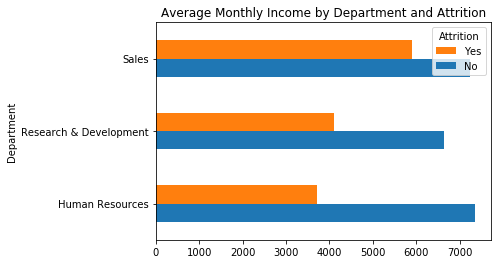

In [29]:
subset=df[['Department','Attrition','MonthlyIncome']].groupby(['Department','Attrition']).mean().reset_index()
subset.pivot('Department','Attrition','MonthlyIncome').plot(kind='barh',legend='reverse',title='Average Monthly Income by Department and Attrition')
plt.show()

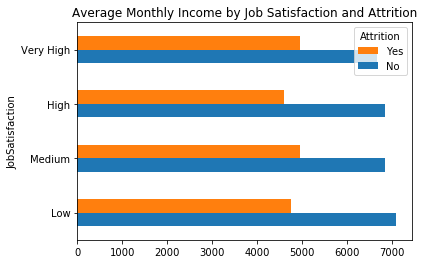

In [30]:
subset=df[['JobSatisfaction','Attrition','MonthlyIncome']].groupby(['JobSatisfaction','Attrition']).mean().reset_index()
subset.pivot('JobSatisfaction','Attrition','MonthlyIncome').plot(kind='barh',legend='reverse',title='Average Monthly Income by Job Satisfaction and Attrition')
y_values = ['Low' , 'Medium' , 'High' , 'Very High']
y_axis = [0,1,2,3]
plt.yticks(y_axis, y_values)
plt.show()

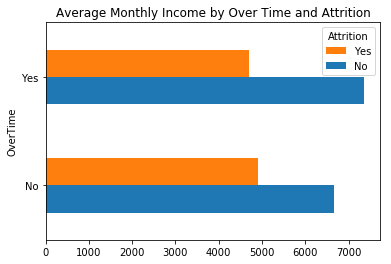

In [31]:
subset=df[['OverTime','Attrition','MonthlyIncome']].groupby(['OverTime','Attrition']).mean().reset_index()
subset.pivot('OverTime','Attrition','MonthlyIncome').plot(kind='barh',legend='reverse',title='Average Monthly Income by Over Time and Attrition')
plt.show()

### 2.3 Job Role

In [32]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

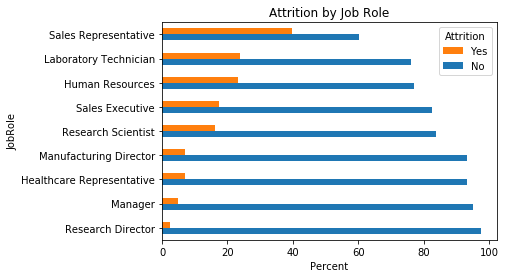

In [33]:
subset=df[['JobRole','Attrition','EmployeeCount']].groupby(['JobRole','Attrition']).count()
subset=subset.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
subset.pivot('JobRole','Attrition','EmployeeCount').sort_values('Yes').plot(kind='barh',legend='reverse',title='Attrition by Job Role')
plt.xlabel('Percent')
plt.show()

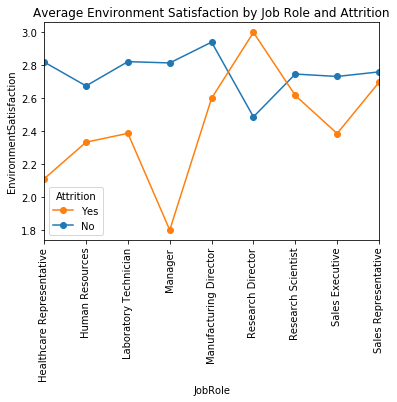

In [34]:
subset=df[['JobRole','Attrition','EnvironmentSatisfaction']].groupby(['JobRole','Attrition']).mean().reset_index()
subset.pivot('JobRole','Attrition','EnvironmentSatisfaction').plot(kind='line',style='o-',legend='reverse',title='Average Environment Satisfaction by Job Role and Attrition')
plt.xticks(rotation=90)
plt.ylabel('EnvironmentSatisfaction')
plt.show()

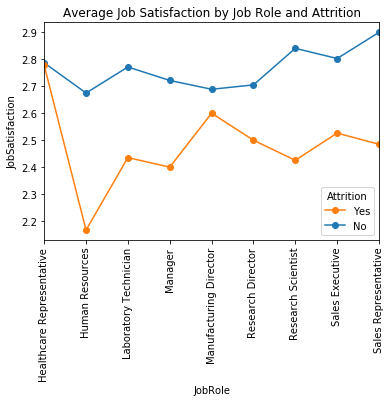

In [35]:
subset=df[['JobRole','Attrition','JobSatisfaction']].groupby(['JobRole','Attrition']).mean().reset_index()
subset.pivot('JobRole','Attrition','JobSatisfaction').plot(kind='line',style='o-',legend='reverse',title='Average Job Satisfaction by Job Role and Attrition')
plt.xticks(rotation=90)
plt.ylabel('JobSatisfaction')
plt.show()

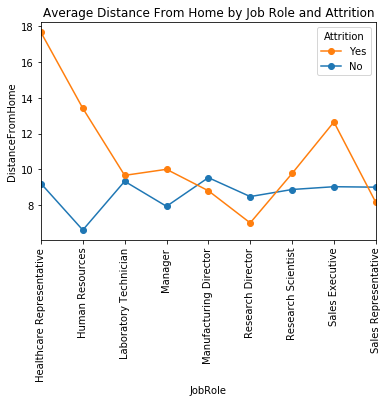

In [36]:
subset=df[['JobRole','Attrition','DistanceFromHome']].groupby(['JobRole','Attrition']).mean().reset_index()
subset.pivot('JobRole','Attrition','DistanceFromHome').plot(kind='line',style='o-',legend='reverse',title='Average Distance From Home by Job Role and Attrition')
plt.xticks(rotation=90)
plt.ylabel('DistanceFromHome')
plt.show()

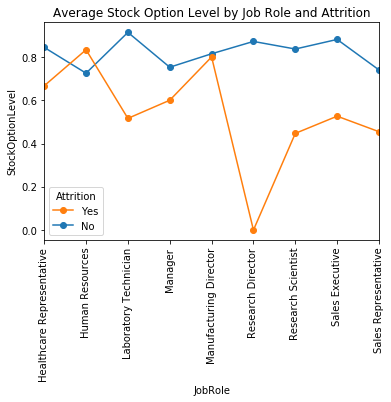

In [37]:
subset=df[['JobRole','Attrition','StockOptionLevel']].groupby(['JobRole','Attrition']).mean().reset_index()
subset.pivot('JobRole','Attrition','StockOptionLevel').plot(kind='line',style='o-',legend='reverse',title='Average Stock Option Level by Job Role and Attrition')
plt.xticks(rotation=90)
plt.ylabel('StockOptionLevel')
plt.show()

## 3. Model

### 3.1 Multicollinearity

In [38]:
new_df = df.copy()
new_df.head()
cleanup_nums = {'BusinessTravel':  {'Travel_Frequently':3, 'Travel_Rarely':2, 'Non-Travel':1},'Attrition': {'Yes':1, 'No':0}, 'OverTime': {'Yes':1, 'No':0}}
new_df.replace(cleanup_nums, inplace=True)
new_df[['Department','EducationField','Gender','JobRole','MaritalStatus']]=new_df[['Department','EducationField','Gender','JobRole','MaritalStatus']].astype('category')
new_df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],inplace=True)
new_df=new_df[ ['Attrition'] + [ col for col in new_df.columns if col != 'Attrition' ] ]
new_df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,3,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,2,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,33,3,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,27,2,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


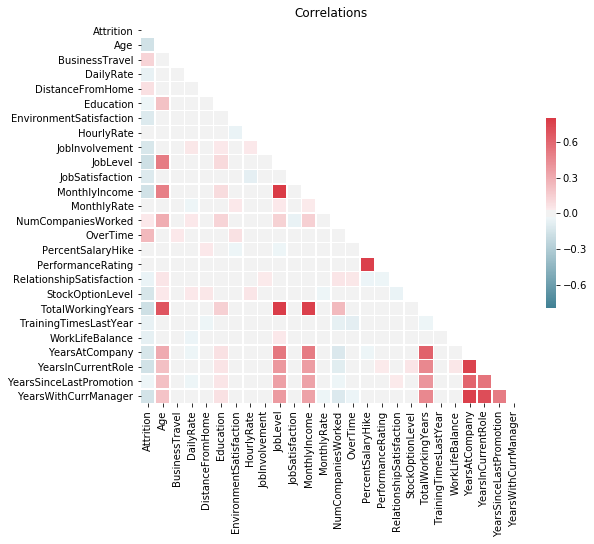

In [39]:
corr=new_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-0.8, vmax=0.8, annot=False, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations')
plt.show()

### 3.2 Decision Tree

In [40]:
new_df_d=pd.get_dummies(new_df)
X = new_df_d.iloc[:,1:]
y = new_df_d.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3,random_state=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_pred_p = model.predict_proba(X_test)
y_train_pred_p = model.predict_proba(X_train)

print('Train set F1 score is {:.2%}'.format(f1_score(y_train,y_train_pred)))
print('Train set ROC AUC is {:.2%}'.format(roc_auc_score(y_train,y_train_pred_p[:, 1])))
print('Train set accuracy is {:.2%}'.format(model.score(X_train,y_train)))
print('Test set F1 score is {:.2%}'.format(f1_score(y_test,y_pred)))
print('Test set ROC AUC is {:.2%}'.format(roc_auc_score(y_test,y_pred_p[:, 1])))
print('Test set accuracy is {:.2%}'.format(model.score(X_test,y_test)))
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).iloc[0:5]

Train set F1 score is 25.35%
Train set ROC AUC is 74.43%
Train set accuracy is 85.57%
Test set F1 score is 12.50%
Test set ROC AUC is 72.76%
Test set accuracy is 84.78%


TotalWorkingYears       0.281432
JobLevel                0.252597
OverTime                0.208237
MaritalStatus_Single    0.082268
DistanceFromHome        0.070903
dtype: float64

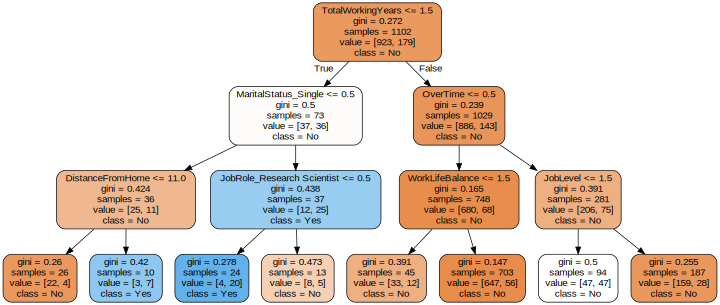

In [42]:
import pydotplus
import graphviz
from sklearn.tree import export_graphviz

#dot_data = export_graphviz(model, out_file=None) 
#graph = graphviz.Source(dot_data)
#graph.render('tree')


dot_data = export_graphviz(model, out_file=None, feature_names=X.columns.tolist(), class_names=['No','Yes'], filled=True, rounded=True)  
#graph = graphviz.Source(dot_data)  
#graph 

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

### 3.3  Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

auc_score = []

for i in range(1,20):
    model = RandomForestClassifier(max_depth=i,random_state=0)
    model.fit(X_train,y_train)
    y_pred_p_i = model.predict_proba(X_test)
    auc_score.append(roc_auc_score(y_test,y_pred_p_i[:, 1])) 

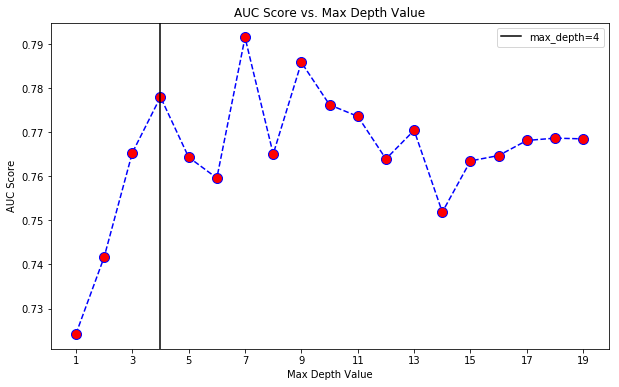

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),auc_score,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('AUC Score vs. Max Depth Value')
plt.xlabel('Max Depth Value')
plt.ylabel('AUC Score')
plt.xticks(np.arange(1, 20, step=2))
plt.axvline(4,color='k',label='max_depth=4')
plt.legend()
plt.show()

In [45]:
model = RandomForestClassifier(max_depth=4,random_state=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_pred_p = model.predict_proba(X_test)
y_train_pred_p = model.predict_proba(X_train)


print('Train set F1 score is {:.2%}'.format(f1_score(y_train,y_train_pred)))
print('Train set ROC AUC is {:.2%}'.format(roc_auc_score(y_train,y_train_pred_p[:, 1])))
print('Train set accuracy is {:.2%}'.format(model.score(X_train,y_train)))
print('Test set F1 score is {:.2%}'.format(f1_score(y_test,y_pred)))
print('Test set ROC AUC is {:.2%}'.format(roc_auc_score(y_test,y_pred_p[:, 1])))
print('Test set accuracy is {:.2%}'.format(model.score(X_test,y_test)))
rf_ds=pd.Series(model.feature_importances_, index=X.columns, name='rf Feature Importance').sort_values(ascending=False).iloc[0:5]
rf_ds

Train set F1 score is 22.77%
Train set ROC AUC is 90.54%
Train set accuracy is 85.84%
Test set F1 score is 12.90%
Test set ROC AUC is 77.80%
Test set accuracy is 85.33%


OverTime             0.100377
MonthlyIncome        0.094766
TotalWorkingYears    0.086821
Age                  0.084543
YearsAtCompany       0.063617
Name: rf Feature Importance, dtype: float64

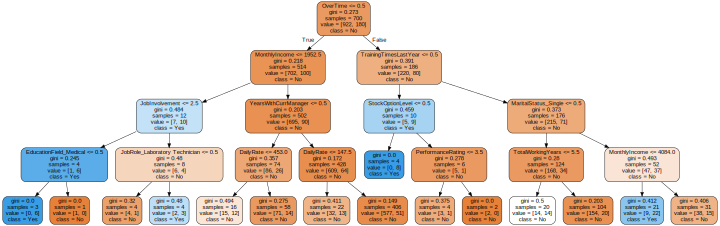

In [46]:
# Extract single tree
estimator = model.estimators_[5]

dot_data = export_graphviz(estimator, out_file=None, feature_names=X.columns.tolist(), class_names=['No','Yes'], filled=True, rounded=True)  

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

### 3.4 Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

auc_score = []

for i in range(1,4):
    for j in np.linspace(0.01,1.01,101)[:-1]:
        model = GradientBoostingClassifier(learning_rate = j, max_depth = i, random_state = 0)
        model.fit(X_train,y_train)
        y_pred_p_i = model.predict_proba(X_test)
        auc_score.append([j,i,roc_auc_score(y_test,y_pred_p_i[:, 1])]) 

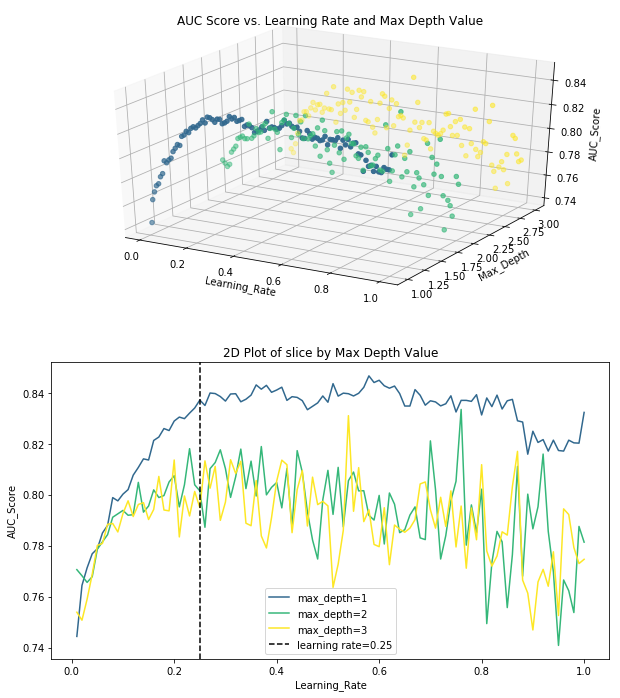

In [48]:
from mpl_toolkits.mplot3d import Axes3D

gbdf=pd.DataFrame(auc_score, columns = ['Learning_Rate', 'Max_Depth','AUC_Score'])
Xs,Ys,Zs = gbdf.Learning_Rate, gbdf.Max_Depth, gbdf.AUC_Score

# 3D Scatter plot
plt.figure(figsize = (10,12))
ax = plt.subplot(211, projection='3d')
# Normalise Ys for calling in the cmap.
Yc = Ys/Ys.max()
cmap = plt.cm.viridis
ax.scatter(Xs, Ys, Zs, facecolors=cmap(Yc))
ax.set_xlabel('Learning_Rate')
ax.set_ylabel('Max_Depth')
ax.set_zlabel('AUC_Score');
ax.set_title('AUC Score vs. Learning Rate and Max Depth Value')

# 2D Plot of slice of 3D plot 
plt.subplot(212)
plt.plot(gbdf[gbdf.Max_Depth==1].Learning_Rate,gbdf[gbdf.Max_Depth==1].AUC_Score, color=cmap(1/3),label='max_depth=1')
plt.plot(gbdf[gbdf.Max_Depth==2].Learning_Rate,gbdf[gbdf.Max_Depth==2].AUC_Score, color=cmap(2/3),label='max_depth=2')
plt.plot(gbdf[gbdf.Max_Depth==3].Learning_Rate,gbdf[gbdf.Max_Depth==3].AUC_Score, color=cmap(3/3),label='max_depth=3')
plt.title('2D Plot of slice by Max Depth Value')
plt.axvline(0.25,linestyle='dashed',color='k',label='learning rate=0.25')
plt.xlabel('Learning_Rate')
plt.ylabel('AUC_Score')
plt.legend()
plt.show()


In [49]:
model = GradientBoostingClassifier(learning_rate=0.25, max_depth=1,random_state=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_pred_p = model.predict_proba(X_test)
y_train_pred_p = model.predict_proba(X_train)


print('Train set F1 score is {:.2%}'.format(f1_score(y_train,y_train_pred)))
print('Train set ROC AUC is {:.2%}'.format(roc_auc_score(y_train,y_train_pred_p[:, 1])))
print('Train set accuracy is {:.2%}'.format(model.score(X_train,y_train)))
print('Test set F1 score is {:.2%}'.format(f1_score(y_test,y_pred)))
print('Test set ROC AUC is {:.2%}'.format(roc_auc_score(y_test,y_pred_p[:, 1])))
print('Test set accuracy is {:.2%}'.format(model.score(X_test,y_test)))
gb_ds=pd.Series(model.feature_importances_, index=X.columns, name='gb Feature Importance').sort_values(ascending=False).iloc[0:5]
gb_ds

Train set F1 score is 56.92%
Train set ROC AUC is 90.19%
Train set accuracy is 89.84%
Test set F1 score is 45.00%
Test set ROC AUC is 83.72%
Test set accuracy is 88.04%


OverTime                0.164382
TotalWorkingYears       0.093833
MonthlyIncome           0.091491
YearsWithCurrManager    0.078254
StockOptionLevel        0.075790
Name: gb Feature Importance, dtype: float64

In [50]:
from xgboost import XGBClassifier

auc_score = []

for i in range(1,4):
    for j in np.linspace(0.01,1.01,101)[:-1]:
        model = XGBClassifier(learning_rate = j, max_depth = i, random_state = 0)
        model.fit(X_train,y_train)
        y_pred_p_i = model.predict_proba(X_test)
        auc_score.append([j,i,roc_auc_score(y_test,y_pred_p_i[:, 1])]) 

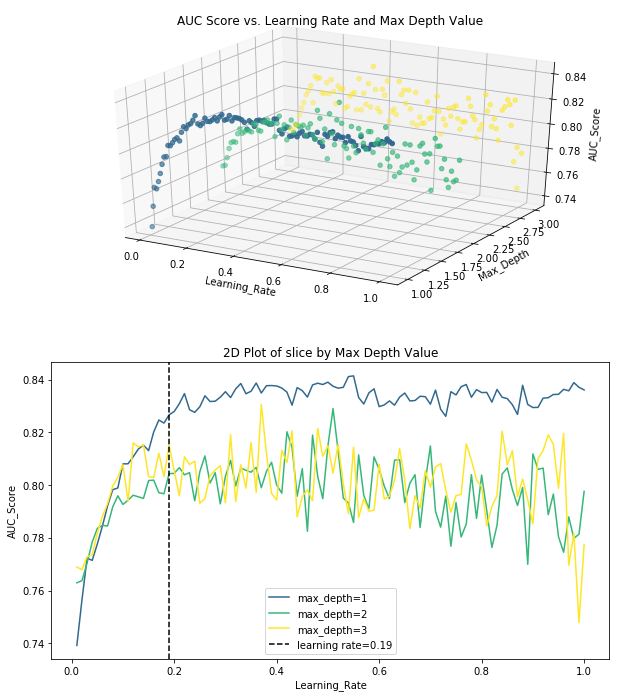

In [51]:
gbdf=pd.DataFrame(auc_score, columns = ['Learning_Rate', 'Max_Depth','AUC_Score'])
Xs,Ys,Zs = gbdf.Learning_Rate, gbdf.Max_Depth, gbdf.AUC_Score

# 3D Scatter plot
plt.figure(figsize = (10,12))
ax = plt.subplot(211, projection='3d')
# Normalise Ys for calling in the cmap.
Yc = Ys/Ys.max()
cmap = plt.cm.viridis
ax.scatter(Xs, Ys, Zs, facecolors=cmap(Yc))
ax.set_xlabel('Learning_Rate')
ax.set_ylabel('Max_Depth')
ax.set_zlabel('AUC_Score');
ax.set_title('AUC Score vs. Learning Rate and Max Depth Value')

# 2D Plot of slice of 3D plot 
plt.subplot(212)
plt.plot(gbdf[gbdf.Max_Depth==1].Learning_Rate,gbdf[gbdf.Max_Depth==1].AUC_Score, color=cmap(1/3),label='max_depth=1')
plt.plot(gbdf[gbdf.Max_Depth==2].Learning_Rate,gbdf[gbdf.Max_Depth==2].AUC_Score, color=cmap(2/3),label='max_depth=2')
plt.plot(gbdf[gbdf.Max_Depth==3].Learning_Rate,gbdf[gbdf.Max_Depth==3].AUC_Score, color=cmap(3/3),label='max_depth=3')
plt.title('2D Plot of slice by Max Depth Value')
plt.axvline(0.19,linestyle='dashed',color='k',label='learning rate=0.19')
plt.xlabel('Learning_Rate')
plt.ylabel('AUC_Score')
plt.legend()
plt.show()

In [52]:
model = XGBClassifier(learning_rate=0.19, max_depth=1,random_state=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_pred_p = model.predict_proba(X_test)
y_train_pred_p = model.predict_proba(X_train)


print('Train set F1 score is {:.2%}'.format(f1_score(y_train,y_train_pred)))
print('Train set ROC AUC is {:.2%}'.format(roc_auc_score(y_train,y_train_pred_p[:, 1])))
print('Train set accuracy is {:.2%}'.format(model.score(X_train,y_train)))
print('Test set F1 score is {:.2%}'.format(f1_score(y_test,y_pred)))
print('Test set ROC AUC is {:.2%}'.format(roc_auc_score(y_test,y_pred_p[:, 1])))
print('Test set accuracy is {:.2%}'.format(model.score(X_test,y_test)))
xgb_ds=pd.Series(model.feature_importances_, index=X.columns, name='xgb Feature Importance').sort_values(ascending=False).iloc[0:5]
xgb_ds

Train set F1 score is 45.38%
Train set ROC AUC is 88.80%
Train set accuracy is 88.20%
Test set F1 score is 45.57%
Test set ROC AUC is 82.66%
Test set accuracy is 88.32%


TotalWorkingYears       0.145578
OverTime                0.061259
StockOptionLevel        0.059249
Age                     0.058800
YearsWithCurrManager    0.058007
Name: xgb Feature Importance, dtype: float32

### 3.5  Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X_train)
n_X_train = scaler.transform(X_train)
n_X_test = scaler.transform(X_test)

auc_score = []

for i in np.linspace(0.1,4.1,401):
    model = LogisticRegression(solver ='liblinear',C=i)
    model.fit(n_X_train,y_train)
    y_pred_p_i = model.predict_proba(n_X_test)
    auc_score.append(roc_auc_score(y_test,y_pred_p_i[:, 1])) 

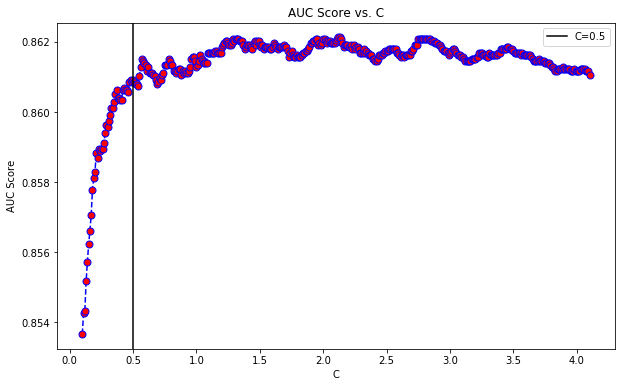

In [54]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0.1,4.1,401),auc_score,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=7)
plt.title('AUC Score vs. C')
plt.xlabel('C')
plt.ylabel('AUC Score')
plt.axvline(0.5,color='k',label='C=0.5')
plt.legend()
plt.show()


In [55]:
model = LogisticRegression(solver ='liblinear', C=0.5)
model.fit(n_X_train,y_train)

y_pred = model.predict(n_X_test)
y_train_pred = model.predict(n_X_train)
y_pred_p = model.predict_proba(n_X_test)
y_train_pred_p = model.predict_proba(n_X_train)


print('Train set F1 score is {:.2%}'.format(f1_score(y_train,y_train_pred)))
print('Train set ROC AUC is {:.2%}'.format(roc_auc_score(y_train,y_train_pred_p[:, 1])))
print('Train set accuracy is {:.2%}'.format(model.score(n_X_train,y_train)))
print('Test set F1 score is {:.2%}'.format(f1_score(y_test,y_pred)))
print('Test set ROC AUC is {:.2%}'.format(roc_auc_score(y_test,y_pred_p[:, 1])))
print('Test set accuracy is {:.2%}'.format(model.score(n_X_test,y_test)))
logit_ds=pd.Series(np.exp(model.coef_[0]), index=X.columns, name='logit Feature Importance').sort_values(ascending=False).iloc[0:5]
logit_ds

Train set F1 score is 50.39%
Train set ROC AUC is 85.95%
Train set accuracy is 88.57%
Test set F1 score is 47.50%
Test set ROC AUC is 86.09%
Test set accuracy is 88.59%


OverTime                   4.513512
YearsSinceLastPromotion    3.381123
BusinessTravel             3.278701
NumCompaniesWorked         2.924847
DistanceFromHome           2.313640
Name: logit Feature Importance, dtype: float64

The variable Over Time increases by one unit (Yes), the odds of the employee in the attrition are over 4.5x as large as the odds that they won’t be in the attrition class. 

### 3.6 Models with SMOTE 

In [56]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_resample(X_train, y_train)

# we can Check the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
print("Number of no attrition in oversampled data",len(os_data_y[os_data_y==0]))
print("Number of attrition",len(os_data_y[os_data_y==1]))
print("Proportion of no attrition data in oversampled data is ",len(os_data_y[os_data_y==0])/len(os_data_X))
print("Proportion of attrition data in oversampled data is ",len(os_data_y[os_data_y==1])/len(os_data_X))

Length of oversampled data is  1846
Number of no attrition in oversampled data 923
Number of attrition 923
Proportion of no attrition data in oversampled data is  0.5
Proportion of attrition data in oversampled data is  0.5


#### 3.6.1  DecisionTree

In [57]:
model = DecisionTreeClassifier(max_depth=3,random_state=0)
model.fit(os_data_X,os_data_y)

y_pred = model.predict(X_test)
y_train_pred = model.predict(os_data_X)
y_pred_p = model.predict_proba(X_test)
y_train_pred_p = model.predict_proba(os_data_X)


print('Train set F1 score is {:.2%}'.format(f1_score(os_data_y,y_train_pred)))
print('Train set ROC AUC is {:.2%}'.format(roc_auc_score(os_data_y,y_train_pred_p[:, 1])))
print('Train set accuracy is {:.2%}'.format(model.score(os_data_X,os_data_y)))
print('Test set F1 score is {:.2%}'.format(f1_score(y_test,y_pred)))
print('Test set ROC AUC is {:.2%}'.format(roc_auc_score(y_test,y_pred_p[:, 1])))
print('Test set accuracy is {:.2%}'.format(model.score(X_test,y_test)))
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).iloc[0:5]

Train set F1 score is 78.21%
Train set ROC AUC is 81.67%
Train set accuracy is 77.36%
Test set F1 score is 25.64%
Test set ROC AUC is 61.38%
Test set accuracy is 68.48%


StockOptionLevel                0.376688
JobSatisfaction                 0.227754
EducationField_Medical          0.190739
JobInvolvement                  0.094921
EducationField_Life Sciences    0.067589
dtype: float64

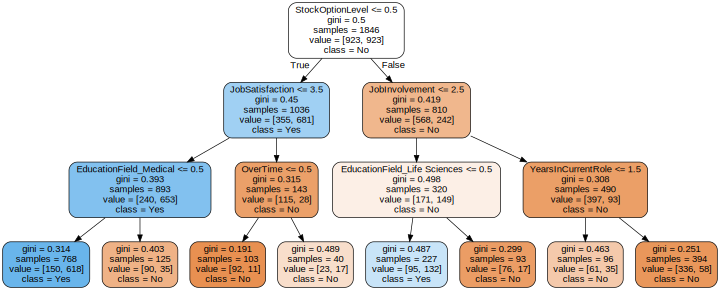

In [58]:
dot_data = export_graphviz(model, out_file=None, feature_names=X.columns.tolist(), class_names=['No','Yes'], filled=True, rounded=True)   

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

#### 3.6.2 Random Forest

In [59]:
auc_score = []
accuracy = []


for i in range(1,20):
    model = RandomForestClassifier(max_depth=i,random_state=0)
    model.fit(os_data_X,os_data_y)
    y_pred_p_i = model.predict_proba(X_test)
    auc_score.append(roc_auc_score(y_test,y_pred_p_i[:, 1])) 
    accuracy.append(model.score(X_test,y_test))

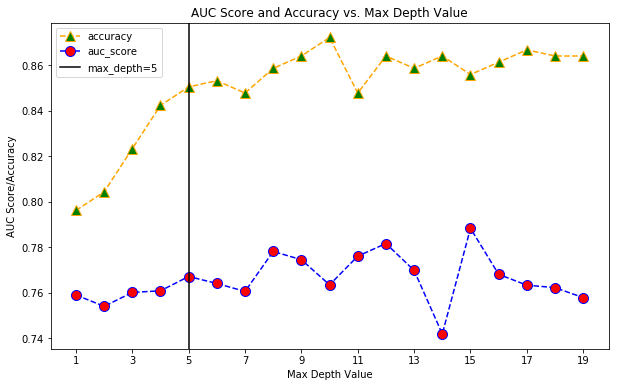

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), accuracy,color='orange', linestyle='dashed', marker='^', markerfacecolor='green', markersize=10, label='accuracy')
plt.plot(range(1,20),auc_score,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10, label='auc_score')
plt.title('AUC Score and Accuracy vs. Max Depth Value')
plt.xlabel('Max Depth Value')
plt.ylabel('AUC Score/Accuracy')
plt.axvline(5,color='k',label='max_depth=5')
plt.legend()
plt.xticks(np.arange(1, 20, step=2))
plt.show()

In [61]:
model = RandomForestClassifier(max_depth=5,random_state=0)
model.fit(os_data_X,os_data_y)

y_pred = model.predict(X_test)
y_train_pred = model.predict(os_data_X)
y_pred_p = model.predict_proba(X_test)
y_train_pred_p = model.predict_proba(os_data_X)


print('Train set F1 score is {:.2%}'.format(f1_score(os_data_y,y_train_pred)))
print('Train set ROC AUC is {:.2%}'.format(roc_auc_score(os_data_y,y_train_pred_p[:, 1])))
print('Train set accuracy is {:.2%}'.format(model.score(os_data_X,os_data_y)))
print('Test set F1 score is {:.2%}'.format(f1_score(y_test,y_pred)))
print('Test set ROC AUC is {:.2%}'.format(roc_auc_score(y_test,y_pred_p[:, 1])))
print('Test set accuracy is {:.2%}'.format(model.score(X_test,y_test)))
smote_rf_ds=pd.Series(model.feature_importances_, index=X.columns,name='smote_rf Feature Importance').sort_values(ascending=False).iloc[0:5]
smote_rf_ds

Train set F1 score is 91.59%
Train set ROC AUC is 97.28%
Train set accuracy is 91.66%
Test set F1 score is 45.54%
Test set ROC AUC is 76.71%
Test set accuracy is 85.05%


JobSatisfaction           0.093659
StockOptionLevel          0.078362
JobLevel                  0.069049
EducationField_Medical    0.064216
JobInvolvement            0.050595
Name: smote_rf Feature Importance, dtype: float64

#### 3.6.3 Gradient Boosting

In [62]:
score = []

for i in range(1,4):
    for j in np.linspace(0.01,1.01,101)[:-1]:
        model = GradientBoostingClassifier(learning_rate = j, max_depth = i, random_state = 0)
        model.fit(os_data_X,os_data_y)
        y_pred_p_i = model.predict_proba(X_test)
        score.append([j,i,roc_auc_score(y_test,y_pred_p_i[:, 1]),model.score(X_test,y_test)]) 

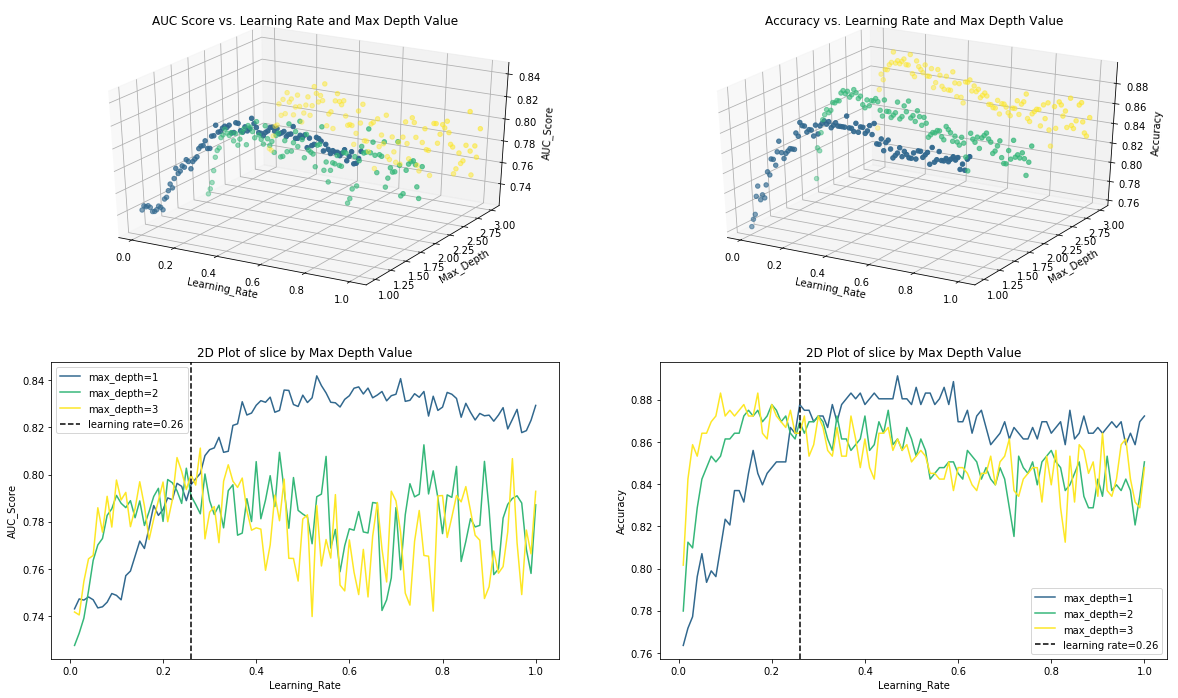

In [63]:
gbdf=pd.DataFrame(score, columns = ['Learning_Rate', 'Max_Depth','AUC_Score','Accuracy'])


Xs,Ys,Zs,As = gbdf.Learning_Rate, gbdf.Max_Depth, gbdf.AUC_Score, gbdf.Accuracy

# 3D Scatter plot
plt.figure(figsize = (20,12))
ax = plt.subplot(221, projection='3d')
# Normalise Ys for calling in the cmap.
Yc = Ys/Ys.max()
cmap = plt.cm.viridis
ax.scatter(Xs, Ys, Zs, facecolors=cmap(Yc))
ax.set_xlabel('Learning_Rate')
ax.set_ylabel('Max_Depth')
ax.set_zlabel('AUC_Score');
ax.set_title('AUC Score vs. Learning Rate and Max Depth Value')

# 3D Scatter plot
ax = plt.subplot(222, projection='3d')
# Normalise Ys for calling in the cmap.
ax.scatter(Xs, Ys, As, facecolors=cmap(Yc))
ax.set_xlabel('Learning_Rate')
ax.set_ylabel('Max_Depth')
ax.set_zlabel('Accuracy');
ax.set_title('Accuracy vs. Learning Rate and Max Depth Value')

# 2D Plot of slice of 3D plot 
plt.subplot(223)
plt.plot(gbdf[gbdf.Max_Depth==1].Learning_Rate,gbdf[gbdf.Max_Depth==1].AUC_Score, color=cmap(1/3),label='max_depth=1')
plt.plot(gbdf[gbdf.Max_Depth==2].Learning_Rate,gbdf[gbdf.Max_Depth==2].AUC_Score, color=cmap(2/3),label='max_depth=2')
plt.plot(gbdf[gbdf.Max_Depth==3].Learning_Rate,gbdf[gbdf.Max_Depth==3].AUC_Score, color=cmap(3/3),label='max_depth=3')
plt.title('2D Plot of slice by Max Depth Value')
plt.axvline(0.26,linestyle='dashed',color='k',label='learning rate=0.26')
plt.xlabel('Learning_Rate')
plt.ylabel('AUC_Score')
plt.legend()

# 2D Plot of slice of 3D plot 
plt.subplot(224)
plt.plot(gbdf[gbdf.Max_Depth==1].Learning_Rate,gbdf[gbdf.Max_Depth==1].Accuracy, color=cmap(1/3),label='max_depth=1')
plt.plot(gbdf[gbdf.Max_Depth==2].Learning_Rate,gbdf[gbdf.Max_Depth==2].Accuracy, color=cmap(2/3),label='max_depth=2')
plt.plot(gbdf[gbdf.Max_Depth==3].Learning_Rate,gbdf[gbdf.Max_Depth==3].Accuracy, color=cmap(3/3),label='max_depth=3')
plt.title('2D Plot of slice by Max Depth Value')
plt.axvline(0.26,linestyle='dashed',color='k',label='learning rate=0.26')
plt.xlabel('Learning_Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [64]:
model = GradientBoostingClassifier(learning_rate=0.26, max_depth=1,random_state=0)
model.fit(os_data_X,os_data_y)

y_pred = model.predict(X_test)
y_train_pred = model.predict(os_data_X)
y_pred_p = model.predict_proba(X_test)
y_train_pred_p = model.predict_proba(os_data_X)


print('Train set F1 score is {:.2%}'.format(f1_score(os_data_y,y_train_pred)))
print('Train set ROC AUC is {:.2%}'.format(roc_auc_score(os_data_y,y_train_pred_p[:, 1])))
print('Train set accuracy is {:.2%}'.format(model.score(os_data_X,os_data_y)))
print('Test set F1 score is {:.2%}'.format(f1_score(y_test,y_pred)))
print('Test set ROC AUC is {:.2%}'.format(roc_auc_score(y_test,y_pred_p[:, 1])))
print('Test set accuracy is {:.2%}'.format(model.score(X_test,y_test)))
smote_gb_ds=pd.Series(model.feature_importances_, index=X.columns,name='smote_gb Feature Importance').sort_values(ascending=False).iloc[0:5]
smote_gb_ds

Train set F1 score is 90.90%
Train set ROC AUC is 96.45%
Train set accuracy is 91.17%
Test set F1 score is 53.61%
Test set ROC AUC is 79.57%
Test set accuracy is 87.77%


JobLevel                             0.105709
EducationField_Medical               0.099552
JobSatisfaction                      0.088889
StockOptionLevel                     0.082873
Department_Research & Development    0.079268
Name: smote_gb Feature Importance, dtype: float64

In [65]:
score = []

for i in range(1,4):
    for j in np.linspace(0.01,1.01,101)[:-1]:
        model = XGBClassifier(learning_rate = j, max_depth = i, random_state = 0)
        model.fit(os_data_X,os_data_y)
        y_pred_p_i = model.predict_proba(X_test)
        score.append([j,i,roc_auc_score(y_test,y_pred_p_i[:, 1]),model.score(X_test,y_test)]) 

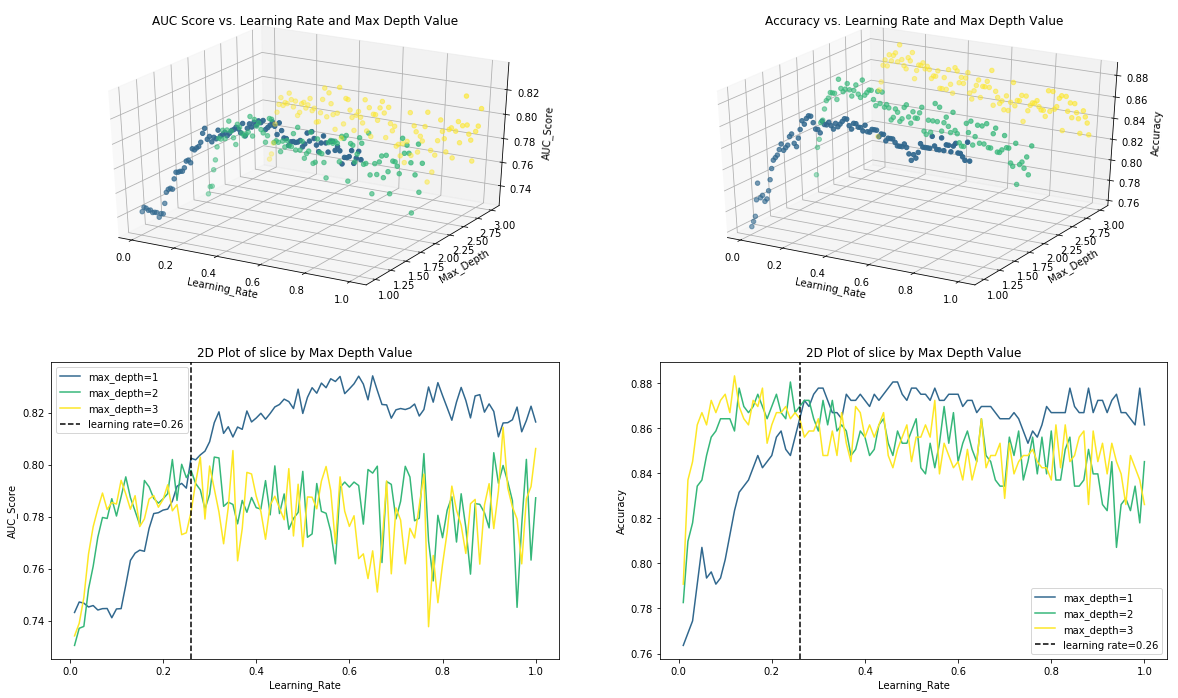

In [66]:
gbdf=pd.DataFrame(score, columns = ['Learning_Rate', 'Max_Depth','AUC_Score','Accuracy'])

Xs,Ys,Zs,As = gbdf.Learning_Rate, gbdf.Max_Depth, gbdf.AUC_Score, gbdf.Accuracy

# 3D Scatter plot
plt.figure(figsize = (20,12))
ax = plt.subplot(221, projection='3d')
# Normalise Ys for calling in the cmap.
Yc = Ys/Ys.max()
cmap = plt.cm.viridis
ax.scatter(Xs, Ys, Zs, facecolors=cmap(Yc))
ax.set_xlabel('Learning_Rate')
ax.set_ylabel('Max_Depth')
ax.set_zlabel('AUC_Score');
ax.set_title('AUC Score vs. Learning Rate and Max Depth Value')

# 3D Scatter plot
ax = plt.subplot(222, projection='3d')
# Normalise Ys for calling in the cmap.
ax.scatter(Xs, Ys, As, facecolors=cmap(Yc))
ax.set_xlabel('Learning_Rate')
ax.set_ylabel('Max_Depth')
ax.set_zlabel('Accuracy');
ax.set_title('Accuracy vs. Learning Rate and Max Depth Value')

# 2D Plot of slice of 3D plot 
plt.subplot(223)
plt.plot(gbdf[gbdf.Max_Depth==1].Learning_Rate,gbdf[gbdf.Max_Depth==1].AUC_Score, color=cmap(1/3),label='max_depth=1')
plt.plot(gbdf[gbdf.Max_Depth==2].Learning_Rate,gbdf[gbdf.Max_Depth==2].AUC_Score, color=cmap(2/3),label='max_depth=2')
plt.plot(gbdf[gbdf.Max_Depth==3].Learning_Rate,gbdf[gbdf.Max_Depth==3].AUC_Score, color=cmap(3/3),label='max_depth=3')
plt.title('2D Plot of slice by Max Depth Value')
plt.axvline(0.26,linestyle='dashed',color='k',label='learning rate=0.26')
plt.xlabel('Learning_Rate')
plt.ylabel('AUC_Score')
plt.legend()

# 2D Plot of slice of 3D plot 
plt.subplot(224)
plt.plot(gbdf[gbdf.Max_Depth==1].Learning_Rate,gbdf[gbdf.Max_Depth==1].Accuracy, color=cmap(1/3),label='max_depth=1')
plt.plot(gbdf[gbdf.Max_Depth==2].Learning_Rate,gbdf[gbdf.Max_Depth==2].Accuracy, color=cmap(2/3),label='max_depth=2')
plt.plot(gbdf[gbdf.Max_Depth==3].Learning_Rate,gbdf[gbdf.Max_Depth==3].Accuracy, color=cmap(3/3),label='max_depth=3')
plt.title('2D Plot of slice by Max Depth Value')
plt.axvline(0.26,linestyle='dashed',color='k',label='learning rate=0.26')
plt.xlabel('Learning_Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [67]:
model = XGBClassifier(learning_rate=0.26, max_depth=1,random_state=0)
model.fit(os_data_X,os_data_y)

y_pred = model.predict(X_test)
y_train_pred = model.predict(os_data_X)
y_pred_p = model.predict_proba(X_test)
y_train_pred_p = model.predict_proba(os_data_X)


print('Train set F1 score is {:.2%}'.format(f1_score(os_data_y,y_train_pred)))
print('Train set ROC AUC is {:.2%}'.format(roc_auc_score(os_data_y,y_train_pred_p[:, 1])))
print('Train set accuracy is {:.2%}'.format(model.score(os_data_X,os_data_y)))
print('Test set F1 score is {:.2%}'.format(f1_score(y_test,y_pred)))
print('Test set ROC AUC is {:.2%}'.format(roc_auc_score(y_test,y_pred_p[:, 1])))
print('Test set accuracy is {:.2%}'.format(model.score(X_test,y_test)))
smote_xgb_ds=pd.Series(model.feature_importances_, index=X.columns, name='smote_xgb Feature Importance').sort_values(ascending=False).iloc[0:5]
smote_xgb_ds

Train set F1 score is 91.38%
Train set ROC AUC is 96.36%
Train set accuracy is 91.60%
Test set F1 score is 48.98%
Test set ROC AUC is 80.25%
Test set accuracy is 86.41%


StockOptionLevel                     0.200214
JobLevel                             0.090804
JobSatisfaction                      0.061970
EducationField_Medical               0.043700
Department_Research & Development    0.043131
Name: smote_xgb Feature Importance, dtype: float32

#### 3.6.4 Logistic Regression

In [68]:
scaler = preprocessing.MinMaxScaler().fit(os_data_X)
n_os_data_X = scaler.transform(os_data_X)
n_X_test = scaler.transform(X_test)

auc_score = []
accuracy = []

for i in np.linspace(0.1,4.1,401):
    model = LogisticRegression(solver ='liblinear',C=i)
    model.fit(n_os_data_X,os_data_y)
    y_pred_p_i = model.predict_proba(n_X_test)
    auc_score.append(roc_auc_score(y_test,y_pred_p_i[:, 1])) 
    accuracy.append(model.score(n_X_test,y_test))

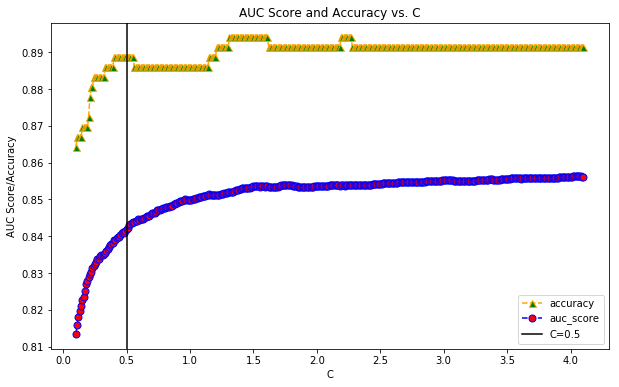

In [69]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0.1,4.1,401),accuracy,color='orange', linestyle='dashed', marker='^', markerfacecolor='green', markersize=7, label='accuracy')
plt.plot(np.linspace(0.1,4.1,401),auc_score,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=7, label='auc_score')
plt.title('AUC Score and Accuracy vs. C')
plt.xlabel('C')
plt.ylabel('AUC Score/Accuracy')
plt.axvline(0.5,color='k',label='C=0.5')
plt.legend()
plt.show()

In [70]:
model = LogisticRegression(solver ='liblinear',C=0.5)
model.fit(n_os_data_X,os_data_y)

y_pred = model.predict(n_X_test)
y_train_pred = model.predict(n_os_data_X)
y_pred_p = model.predict_proba(n_X_test)
y_train_pred_p = model.predict_proba(n_os_data_X)


print('Train set F1 score is {:.2%}'.format(f1_score(os_data_y,y_train_pred)))
print('Train set ROC AUC is {:.2%}'.format(roc_auc_score(os_data_y,y_train_pred_p[:, 1])))
print('Train set accuracy is {:.2%}'.format(model.score(n_os_data_X,os_data_y)))
print('Test set F1 score is {:.2%}'.format(f1_score(y_test,y_pred)))
print('Test set ROC AUC is {:.2%}'.format(roc_auc_score(y_test,y_pred_p[:, 1])))
print('Test set accuracy is {:.2%}'.format(model.score(n_X_test,y_test)))
smote_logit_ds=pd.Series(np.exp(model.coef_[0]), index=X.columns, name='smote_logit Feature Importance').sort_values(ascending=False).iloc[0:5]
smote_logit_ds

Train set F1 score is 91.76%
Train set ROC AUC is 96.99%
Train set accuracy is 92.15%
Test set F1 score is 54.95%
Test set ROC AUC is 84.19%
Test set accuracy is 88.86%


BusinessTravel             3.914109
YearsSinceLastPromotion    3.353697
OverTime                   3.033331
DistanceFromHome           2.855702
NumCompaniesWorked         2.761510
Name: smote_logit Feature Importance, dtype: float64

## 4. Conclusion 

In [71]:
rf_df=rf_ds.to_frame()
gb_df=gb_ds.to_frame()
xgb_df=xgb_ds.to_frame()
logit_df=logit_ds.to_frame()

smote_rf_df=smote_rf_ds.to_frame()
smote_gb_df=smote_gb_ds.to_frame()
smote_xgb_df=smote_xgb_ds.to_frame()
smote_logit_df=smote_logit_ds.to_frame()

In [72]:
result = pd.concat([rf_df, gb_df, xgb_df, logit_df,smote_rf_df, smote_gb_df, smote_xgb_df, smote_logit_df], axis=1, sort=False)
result['Count']=result.count(axis=1)
result=result.sort_values(by='Count',ascending=False)
result.style.highlight_max(color = 'lightgreen', axis = 0)

,rf Feature Importance,gb Feature Importance,xgb Feature Importance,logit Feature Importance,smote_rf Feature Importance,smote_gb Feature Importance,smote_xgb Feature Importance,smote_logit Feature Importance,Count
OverTime,0.100377,0.164382,0.0612593,4.51351,nan,nan,nan,3.03333,5
StockOptionLevel,nan,0.0757897,0.0592493,nan,0.0783615,0.0828725,0.200214,nan,5
TotalWorkingYears,0.0868211,0.0938328,0.145578,nan,nan,nan,nan,nan,3
JobSatisfaction,nan,nan,nan,nan,0.0936586,0.0888891,0.0619701,nan,3
JobLevel,nan,nan,nan,nan,0.069049,0.105709,0.0908041,nan,3
EducationField_Medical,nan,nan,nan,nan,0.0642159,0.0995521,0.0437002,nan,3
MonthlyIncome,0.0947655,0.0914911,nan,nan,nan,nan,nan,nan,2
Age,0.0845433,nan,0.0588005,nan,nan,nan,nan,nan,2
YearsWithCurrManager,nan,0.0782537,0.0580074,nan,nan,nan,nan,nan,2
YearsSinceLastPromotion,nan,nan,nan,3.38112,nan,nan,nan,3.3537,2


## Appendix: Robustness Testing - H2o (Automatic Machine Learning)

In [73]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 11.0.6+8-b765.1, mixed mode)
  Starting server from C:\Users\Moses\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpaxypuc0o
  JVM stdout: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpaxypuc0o\h2o_Moses_started_from_python.out
  JVM stderr: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpaxypuc0o\h2o_Moses_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 25 days
H2O_cluster_name:,H2O_from_python_Moses_xure6w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.969 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [74]:
auto_df = h2o.import_file('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [75]:
auto_df.describe()

Rows:1470
Cols:35




,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
type,int,enum,enum,int,enum,int,int,enum,int,int,int,enum,int,int,int,enum,int,enum,int,int,int,enum,enum,int,int,int,int,int,int,int,int,int,int,int,int
mins,18.0,,,102.0,,1.0,1.0,,1.0,1.0,1.0,,30.0,1.0,1.0,,1.0,,1009.0,2094.0,0.0,,,11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
mean,36.92380952380953,,,802.4857142857143,,9.192517006802724,2.912925170068027,,1.0,1024.865306122449,2.721768707482994,,65.89115646258503,2.7299319727891165,2.0639455782312925,,2.7285714285714286,,6502.931292517007,14313.103401360544,2.6931972789115646,,,15.209523809523809,3.1537414965986397,2.7122448979591836,80.0,0.7938775510204081,11.279591836734694,2.7993197278911564,2.7612244897959184,7.0081632653061225,4.229251700680272,2.1877551020408164,4.1231292517006795
maxs,60.0,,,1499.0,,29.0,5.0,,1.0,2068.0,4.0,,100.0,4.0,5.0,,4.0,,19999.0,26999.0,9.0,,,25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0
sigma,9.135373489136732,,,403.50909994352816,,8.106864435666074,1.0241649445978729,,0.0,602.024334847475,1.0930822146350005,,20.329427593996165,0.7115611429632305,1.1069398989351222,,1.1028461230547204,,4707.956783097994,7117.786044059976,2.498009006070747,,,3.6599377165396407,0.360823524604344,1.0812088864403524,0.0,0.852076667930838,7.780781675514998,1.2892706207958455,0.7064758297141508,6.126525152403569,3.623137034670628,3.2224302791379675,3.5681361205404376
zeros,0,,,0,,0,0,,0,0,0,,0,0,0,,0,,0,0,197,,,0,0,0,0,631,11,54,0,44,244,581,263
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,3.0,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0,Y,No,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,4.0,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,2090.0,2396.0,6.0,Y,Yes,15.0,3.0,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0


In [76]:
auto_y = 'Attrition'
auto_x = auto_df.columns
auto_x.remove(auto_y)
auto_x.remove('EmployeeCount')
auto_x.remove('EmployeeNumber')
auto_x.remove('Over18')
auto_x.remove('StandardHours')

In [77]:
train,test=auto_df.split_frame(ratios=[.75],seed=0)

In [78]:
aml = H2OAutoML(max_models = 10, seed = 0)
aml.train(x = auto_x, y = auto_y, training_frame = train, leaderboard_frame = test)

AutoML progress: |
21:22:29.411: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [79]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20201122_212229,0.84619,0.327831,0.675492,0.205397,0.308212,0.0949945
StackedEnsemble_AllModels_AutoML_20201122_212229,0.839471,0.314611,0.677466,0.211667,0.303454,0.0920842
StackedEnsemble_BestOfFamily_AutoML_20201122_212229,0.838836,0.315468,0.676664,0.211667,0.303949,0.092385
DeepLearning_1_AutoML_20201122_212229,0.831534,0.354863,0.577854,0.250952,0.325763,0.106122
DRF_1_AutoML_20201122_212229,0.817354,0.530103,0.568738,0.24881,0.330564,0.109272
GBM_1_AutoML_20201122_212229,0.81582,0.363386,0.56375,0.251349,0.330858,0.109467
GBM_5_AutoML_20201122_212229,0.814709,0.361091,0.581745,0.246746,0.329327,0.108456
GBM_grid__1_AutoML_20201122_212229_model_1,0.803439,0.363371,0.580948,0.231667,0.329152,0.108341
GBM_3_AutoML_20201122_212229,0.799947,0.375908,0.566234,0.238333,0.332025,0.110241
GBM_2_AutoML_20201122_212229,0.799524,0.373584,0.571831,0.265873,0.3329,0.110822


To understand how the ensemble works, let's take a peek inside the Stacked Ensemble "All Models" model. The "All Models" ensemble is an ensemble of all of the individual models in the AutoML run. This is often the top performing model on the leaderboard.

In [80]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

Examine the variable importance of the metalearner (combiner) algorithm in the ensemble. This shows us how much each base learner is contributing to the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM.

In [81]:
metalearner.coef_norm()
#metalearner.std_coef_plot()

{'Intercept': -2.1658588453064533,
 'GLM_1_AutoML_20201122_212229': 0.9684560479156616,
 'DeepLearning_1_AutoML_20201122_212229': 0.0,
 'DRF_1_AutoML_20201122_212229': 0.0,
 'GBM_1_AutoML_20201122_212229': 0.0,
 'GBM_5_AutoML_20201122_212229': 0.081039192993818,
 'GBM_grid__1_AutoML_20201122_212229_model_1': 0.0,
 'GBM_3_AutoML_20201122_212229': 0.0,
 'GBM_2_AutoML_20201122_212229': 0.0,
 'GBM_4_AutoML_20201122_212229': 0.0,
 'XRT_1_AutoML_20201122_212229': 0.474963883090401}

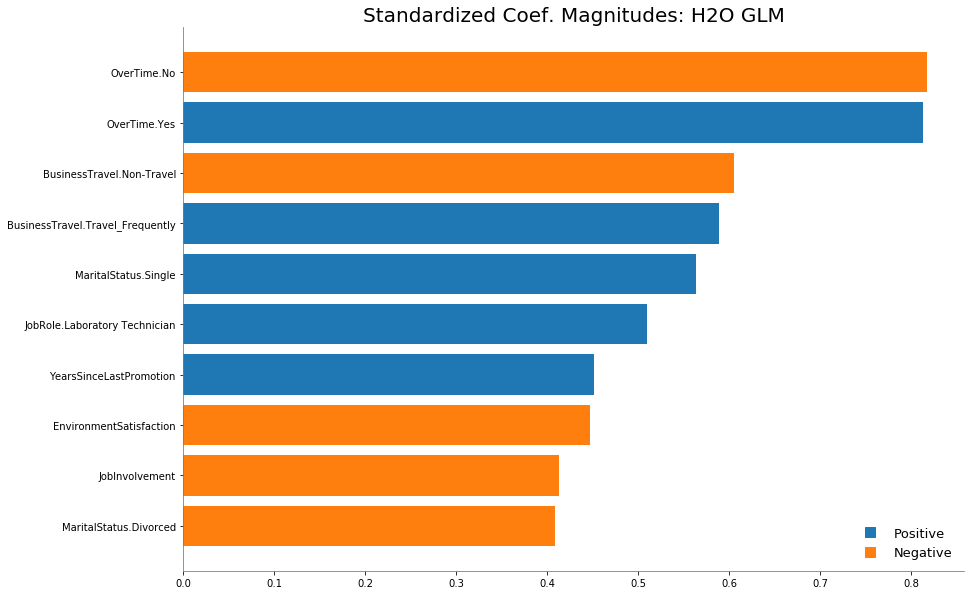

In [82]:
glm1 = h2o.get_model([mid for mid in model_ids if "GLM_1" in mid][0])
fi=glm1.coef_norm()
glm1.std_coef_plot(num_of_features =10)

In [83]:
pd.DataFrame.from_dict(fi, orient='index').sort_values(0).iloc[:6]

,0
Intercept,-1.805987
OverTime.No,-0.817302
BusinessTravel.Non-Travel,-0.605286
EnvironmentSatisfaction,-0.447620
JobInvolvement,-0.413176
MaritalStatus.Divorced,-0.408234


In [84]:
pd.DataFrame.from_dict(fi, orient='index').sort_values(0,ascending=False).iloc[:5]

,0
OverTime.Yes,0.813055
BusinessTravel.Travel_Frequently,0.588597
MaritalStatus.Single,0.564043
JobRole.Laboratory Technician,0.509908
YearsSinceLastPromotion,0.451773
